## Clustering de Clientes por Consumo de Energia - Modelagem

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist

#### Funções

#### Dataset

In [2]:
df = pd.read_csv('..\data\household_power_consumption.txt', sep=',', low_memory=False)
df.drop(['Date','Time'], axis=1, inplace=True)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0


#### Modelagem

In [3]:
# Aplicando redução de dimensionalidade, apenas 25% dos dados serão usados por questões de memória
df, df_aux = train_test_split(df.values, train_size = .01)
pca = PCA(n_components=2).fit_transform(df)

In [4]:
# Criando modelos com diferentes valores de K
k_range = range(1,12)
k_means_var = [KMeans(n_clusters=k).fit(pca) for k in k_range]

In [6]:
Sum_of_squared_distances = []
Total_sum = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca)
    Sum_of_squared_distances.append(km.inertia_)

Com as métricas calculadas acima, vamos plotar a curva de elbow para identificar qual o valor ideal de K para explicar a variância nos dados

In [ ]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

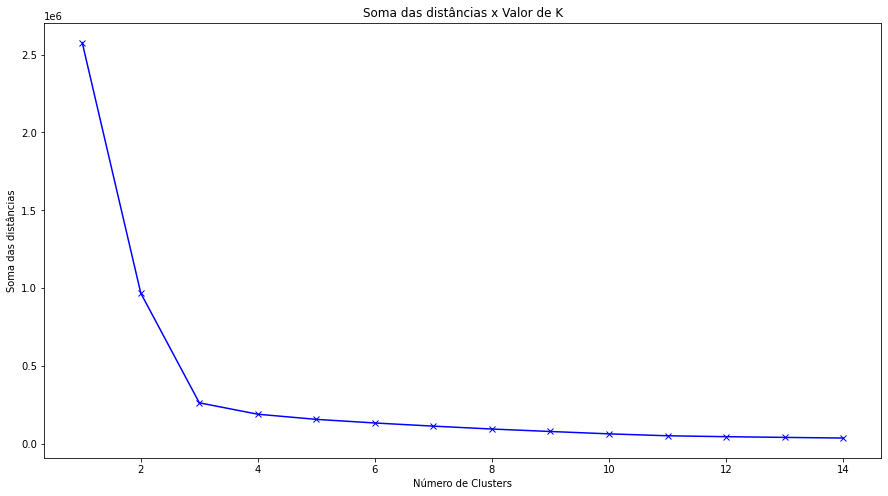

In [7]:
# Curva de Elbow
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(15)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma das distâncias')
plt.title('Soma das distâncias x Valor de K');

[-3.91606554  2.37355538]
[-6.77256735 -0.23458451]
[-5.35663948  1.06200884]
[-6.31468102  1.04000434]
[ 8.17085042 30.68715579]
[-7.06150662  0.58856025]
[-7.28537092  0.4120492 ]
[-6.70806254  0.77214944]
[ 9.55837279 -6.36024898]
[10.35063243 -5.87181185]
[-6.36149719  0.0273941 ]
[26.44580496 25.85296309]
[-5.78701045  1.4079839 ]
[11.01457013 -6.3826126 ]
[-7.16669068 -0.46879623]
[-7.66206649  0.18436524]
[-7.63223603  0.20273652]
[11.00930221 -6.04755998]
[-1.79360226  4.02211583]
[25.80928127 25.98603576]
[13.53445005 -3.72653416]
[10.61010713 -5.6952757 ]
[-7.61523871  0.21749285]
[-6.66720451  0.81013857]
[-6.82944797 -0.26525617]
[10.13224401 -6.00657002]
[-7.12207011  0.91542708]
[-7.41975674  0.33796744]
[-7.74837665  0.12675314]
[ 9.76494544 -6.23287594]
[-6.00721258  0.99525691]
[12.58997684 -5.00957862]
[-6.49389558 -0.04991063]
[10.20501249 -5.40287452]
[-6.95247193 -0.34962775]
[10.87729868 -6.5014785 ]
[-6.83144317  0.70036521]
[17.98891478  5.6370535 ]
[-4.99036033

[ 8.01972137 31.72959032]
[ 6.04006398 23.63465305]
[12.85832134 -4.81831931]
[-6.48606475  0.95158859]
[-7.32733771  0.4203184 ]
[-5.89290606  0.35031152]
[ 9.87602665 -6.16003797]
[23.89286434 -7.12234172]
[ 5.43608672 29.84012964]
[-4.42742862  1.31296186]
[10.76690399 -4.58478826]
[-7.48354321  0.6711536 ]
[19.31130144  9.44976208]
[ 8.15093604 32.40807409]
[19.78385789 -9.58686382]
[-7.60669595  0.20976012]
[10.00498803 -4.76711244]
[-6.43819737  1.54887   ]
[16.07020149 -1.04859561]
[-6.92289026 -0.31419512]
[ 7.34515433 30.85079395]
[-7.12476356  0.51969968]
[-5.70031703  0.83743623]
[10.36982796 -5.46178096]
[-6.76922535 -0.21525642]
[-6.82076017  0.7324713 ]
[12.17669111 -4.28429454]
[ 9.41274054 -5.49170004]
[-7.36716536  0.37040521]
[-7.79771717  0.11800023]
[ 8.95431694 -5.77826759]
[-7.70649468  0.14845261]
[-6.8449847  1.0861052]
[14.38909063 -1.85225238]
[13.63360511 -1.15153271]
[11.84942248 -4.84587525]
[-5.97151423  1.27739302]
[-7.30001379  0.41599164]
[-7.43856111  

[ 9.62026088 -5.36378461]
[11.12371828 -4.36493651]
[-7.74947044  0.13049157]
[10.52352825 -6.71939372]
[-6.37918488  0.02498979]
[14.11556927 -1.4572265 ]
[-8.04411345 -0.04690971]
[-8.25732694 -0.18247769]
[10.41542577 -5.82344112]
[-7.40822022  0.332018  ]
[-7.41237691 -0.6159871 ]
[-6.12135323  0.55653949]
[-7.0504293   0.56544849]
[11.08118429 -5.99891491]
[-6.3706693   0.03468268]
[10.51078516 -5.76049097]
[11.92635881 -4.81147107]
[22.46864992 23.36627561]
[-7.35801118  0.37170539]
[11.57244741 -4.69535172]
[-6.36972398  0.03503785]
[ 9.81543817 -5.83347363]
[15.8102356 -7.2312198]
[-5.6898022   2.61158363]
[-6.80335945  1.10314083]
[-6.17794541  1.17980757]
[10.16094428 -5.41289643]
[20.28678309 12.74578224]
[-5.39233212  1.04013418]
[10.74051122 -6.58576866]
[-6.77141379  0.76291029]
[10.91462596 -5.12186926]
[-6.38672575  0.01181968]
[-7.79615951  0.10175457]
[ 4.07787611 -2.64748675]
[-7.34076992  0.76784167]
[-7.3237154   0.38842794]
[-6.87006252 -0.2730908 ]
[10.77384615 -

[-4.83927716  1.03820425]
[-6.54348022 -0.08052111]
[-7.6545523   0.19324167]
[12.31831205 -4.56960629]
[-8.47541272 -0.31253466]
[-6.75491844 -0.2235522 ]
[-6.87857018  1.03962686]
[-6.43011762  0.36622825]
[ 9.32653759 -6.50724243]
[-8.45114479 -0.31050094]
[-6.84690475  0.69906111]
[-7.02597329  0.58874675]
[-6.42258084  0.73071743]
[ 9.20803356 -4.67233176]
[-7.99983626 -0.03668295]
[10.15345673 -5.97202997]
[-6.80053254  0.7581455 ]
[ 9.78737935 -7.17729794]
[20.90122876 -8.85550087]
[ 8.11518871 -0.32512446]
[-4.0100363   2.57963071]
[-5.53481967  0.9434732 ]
[-7.59386063  0.23054149]
[-5.51930515  1.55988616]
[13.63995865 -1.04788121]
[-6.96125431  0.61183729]
[-6.80370446  0.12329125]
[-8.05911898 -0.06892978]
[10.3923907  -4.84957448]
[-7.58890609  0.22930105]
[10.41716437 -5.82695588]
[15.86419754 -1.20937758]
[-5.02424824  0.92394692]
[-7.16462442 -0.46740141]
[-7.78177867  0.10185882]
[-5.79338028  1.42975559]
[12.30143601 -4.55472894]
[-7.62778456  0.57371364]
[10.80777944

[-6.09983246  0.19284155]
[-6.59076995  0.26308235]
[-6.01858314  0.251663  ]
[-7.16666042  0.87926427]
[-7.73262262 -0.81747799]
[ 9.88550994 -6.1629394 ]
[11.52125553 -3.7259557 ]
[11.42131403 -6.1451116 ]
[12.12020651 -4.65767161]
[-7.10201041  0.5380224 ]
[-7.51975056  0.27192344]
[-6.92766338  0.6744033 ]
[-5.77943287  1.44262495]
[-4.86979081  2.77443665]
[11.16986609 -5.3116957 ]
[-6.13595736  0.17926679]
[-5.85094814  1.10426767]
[-8.25421621 -0.17640769]
[-5.84222889  1.70820511]
[-7.95245763e+00 -3.21971236e-03]
[10.34381995 -3.18908914]
[12.78526066 -2.8915913 ]
[-6.36197888  0.02711206]
[-7.50996143  0.28238319]
[11.4040048  -6.14277798]
[10.82946289 -5.18722913]
[-7.08365844  0.53201157]
[-7.31899297  0.77677498]
[-4.97339721  1.66214679]
[22.0622129  15.99254901]
[-4.85977172  0.02384322]
[11.59042873 -4.03457569]
[-6.8416446 -0.2727159]
[-8.41447768 -0.27489844]
[-5.90383972  1.07171473]
[-7.22646688  0.48693887]
[ 9.64461928 -4.96741873]
[10.23250732 -5.36864937]
[ 6.60

[-4.85920401  1.01739669]
[ 2.34801072 -3.18361448]
[12.2595369  -5.58130193]
[24.16555868 23.92949203]
[-6.58197343  2.0148957 ]
[-6.2779437   0.45146088]
[-6.37521412  1.39634736]
[-2.09819337  3.40105721]
[11.55623058 -4.09002057]
[-6.49637128  0.33836279]
[-8.04924947 -0.0586587 ]
[-4.66050956  1.14750748]
[-7.41101648  0.33043963]
[-7.55801191  0.2527159 ]
[-7.81260779  0.10009603]
[ 5.20839499 -3.25204208]
[-6.86390549  0.71033477]
[-7.38600574  0.37985582]
[-6.7070862   0.81126286]
[-7.14386923  0.51207206]
[-7.15757473  0.87208217]
[-6.58697502 -0.10731351]
[-5.66765175  1.48143018]
[12.12395231 -4.68126733]
[10.42066979 -6.77850282]
[-6.78037703 -0.23500382]
[-7.53645922  0.27033077]
[10.98351663 -5.09213578]
[-6.84904663 -0.27732241]
[-5.29394603  1.70746803]
[-7.70905873  0.14247062]
[-5.16232478  1.80554455]
[-6.51162356  0.8887284 ]
[-6.73170231  0.80890573]
[-7.60564954  0.22329339]
[-7.65090353 -0.76718845]
[-6.30858397  0.06847465]
[18.54250929  9.92555769]
[-6.41099327

[ 4.94918121 -3.10328964]
[ 9.30265489 -5.5552319 ]
[-7.22729331  0.84584488]
[-6.45286293  1.6787398 ]
[12.28580211 -4.56005448]
[11.14975717 -5.31521792]
[10.2190918  -6.90691892]
[ 5.1819521  -4.29503357]
[15.14036725 -3.66985282]
[10.88359681 -4.94610176]
[-8.04677789 -0.05714534]
[11.28361198 -5.19463101]
[-5.74873551  1.81280959]
[-6.6076501  -0.13717945]
[-6.57352954 -0.10747683]
[-7.76462404  0.11684852]
[-6.42367998  0.36595456]
[-2.22377066 -0.481193  ]
[ 8.87478698 -5.83159107]
[-7.38390605  0.35142094]
[14.86221375  3.14429688]
[10.77289167 -4.84085516]
[-7.13984258  0.50615973]
[ 9.57899504 -4.43541949]
[-7.09761675  0.91763309]
[-5.55809467  1.31837275]
[-7.79953497  0.09965946]
[11.16302443 -6.29552598]
[10.49129877 -4.7630115 ]
[10.8026188  -5.01331381]
[-7.66280774  0.20068797]
[10.31878259 -6.84985956]
[-7.82355829  0.09776402]
[22.70486197 -9.28826464]
[-6.91533248 -0.31379814]
[10.42990207 -5.78027475]
[-6.00143233  1.37991576]
[10.25268225 -5.92388548]
[-7.69153446

[-7.54403199  0.2613893 ]
[10.29461908 -6.86901225]
[12.45947094 -4.46152771]
[-5.7044926   1.18592776]
[-6.78170125  0.75222951]
[-7.84001637  0.07454572]
[-7.48072388  0.86349315]
[-7.44988634  0.32357126]
[-7.23015058  0.46332334]
[-6.51010411  1.26677899]
[-4.99165507  1.65939607]
[-7.37359909 -0.60477335]
[-7.53025792  0.27411899]
[10.68856018 -6.6134903 ]
[ 5.84317129 -1.85588085]
[-8.0989777  -0.09345075]
[-6.54324886 -0.09326575]
[-3.28759346  3.09324866]
[-7.54117939 -0.7038145 ]
[10.7232598  -6.60489117]
[10.34552389 -6.8334295 ]
[-6.82318064 -0.25285292]
[10.4771107  -6.74808125]
[10.25042617 -5.92938385]
[-7.02713283  0.96965378]
[ 9.97390649 -5.72726063]
[-5.26927045  2.48111624]
[ 9.70326151 -6.27937737]
[ 9.62336453 -6.32448452]
[-2.0996    6.104008]
[-7.73332141  0.13182047]
[12.86903527 34.39718367]
[-6.57828304 -0.11044123]
[-6.98611812  0.9776679 ]
[ 9.23298493 -5.58955789]
[-4.72720693  1.11991349]
[10.29971941 -5.89909216]
[-8.21796107 -0.1583541 ]
[11.48132519 -3.

[ 9.66615271 -6.2808639 ]
[-2.46516684  3.61735977]
[3.20026089e-03 1.43667770e+01]
[0.96407504 4.89506147]
[-3.98335446  2.96866558]
[-6.60835585  1.23616634]
[-6.26410512  0.08722007]
[-8.05920596 -0.06895009]
[-7.71090184  0.15408084]
[-0.55162337  4.86888032]
[-6.08957917  0.55899871]
[ 9.79472238 -6.21893538]
[28.11143031 31.29006237]
[-6.74564715  1.50257257]
[-6.97683482  1.00050883]
[-6.2440064   0.11261617]
[-7.81898975  0.09179114]
[-6.70200707  0.76288165]
[ 9.90122177 -6.14018489]
[-7.81061577  0.08844979]
[11.28022131 -5.86768327]
[22.03240842 15.34588182]
[ 9.8628725  -6.16395471]
[-4.11512818  2.8397635 ]
[13.75430508 -2.87593785]
[-5.31846394  1.74801897]
[19.09188953 12.61688057]
[-7.3982208  1.0877905]
[-7.91525081  0.01978051]
[-7.01198502  0.96600959]
[10.53595229 -5.38103807]
[ 21.2054625  -10.61877149]
[-6.66621456  0.83637438]
[ 9.59676684 -5.38692046]
[-6.54185587  0.91738258]
[-5.1640742   4.74694397]
[-6.68311776  0.79179841]
[-6.87477157 -0.2890162 ]
[-6.4596

[10.43913561 -6.74135803]
[21.86931499 11.3836341 ]
[13.31317784 -3.90152314]
[-6.63556132  0.85941419]
[-6.99043277 -0.36870378]
[-5.9097219   1.33682486]
[12.12371027 -3.30358132]
[11.52421623 -5.50086368]
[10.56789421 -4.97989881]
[-6.3403091   0.78140302]
[-6.80907051  0.70558126]
[-7.48089511  0.29592514]
[-7.36994062  0.37282884]
[ 9.19524385 -5.62555148]
[ 9.62997739 -5.36214887]
[-8.01375951 -0.03679625]
[-6.44075828 -0.02145878]
[11.26686475 -4.25951876]
[-7.55564111  0.24569218]
[11.29128611 -6.21650208]
[-7.21559746  0.82770295]
[-7.35163969  0.39701728]
[-6.70788838  1.53449163]
[-4.28956976  1.40646308]
[-0.42732818 -2.01897475]
[-6.7676714  -0.20562018]
[10.58403532 -5.72388679]
[10.60514096 -4.32887942]
[-7.91766266  0.02668956]
[-6.20531248  0.50921336]
[-8.15112483 -0.12560032]
[ 9.93057834 -6.1009326 ]
[10.87625402 -5.15835107]
[-7.68719057  0.16889325]
[-7.73432931  0.13981856]
[-5.70224595  0.86200819]
[-6.31020605  0.06759388]
[10.29976623 -5.91186596]
[10.61934414

[24.72939116 26.15721724]
[ 4.20133222 -4.91213896]
[-5.59951977  1.26350372]
[-4.83881705  1.02973283]
[11.33013288 -4.21631973]
[-5.66882711  1.22509628]
[-8.27442655 -0.1929926 ]
[-6.74599336  0.55296506]
[10.85255023 -3.9771482 ]
[-6.92733751  0.65849551]
[10.11885152 -5.02677684]
[-7.7400911   0.14056882]
[-6.62752573 -0.13652209]
[-7.31174026  0.78995664]
[-6.29376678  0.45462355]
[-8.00622278 -0.03207164]
[-6.33629335  1.01823416]
[21.60926065 23.79070265]
[-6.54416398 -0.08078268]
[-6.02468387  1.93406683]
[ 9.98018426 -5.1291256 ]
[-6.84918522  1.07073062]
[-6.97897864  0.99072489]
[-7.024203    1.34377792]
[10.48462085 -5.76792556]
[-7.51512262 -0.68352206]
[-7.52328279  0.26985349]
[12.89356905 -3.60536945]
[-7.90795101  0.0284026 ]
[-7.40127471  0.34059208]
[16.96157543  8.16765194]
[10.79469532 -5.56866711]
[-7.06863706  1.30375821]
[-6.25356113  0.84776026]
[-4.58557102 -0.40523551]
[-7.37822962  0.35486744]
[-7.54306059  0.25318291]
[-7.23775465  0.44578299]
[-7.26427325

[-0.64264413  0.21883262]
[-7.36419228 -0.58183555]
[-7.25351588  0.44462225]
[ 8.90494755 -5.81310528]
[-6.29767844  0.07531125]
[-6.99755897  0.99212126]
[-6.69861876  1.18489458]
[-6.49094317 -0.04825836]
[-6.84716331  1.07190629]
[-8.3235781  -0.22343022]
[-6.82061977  0.70710421]
[-7.24779358 -0.54008001]
[ 1.39559491 16.38072985]
[-4.37907094  1.69440459]
[10.5738654  -4.77201187]
[-7.44952091  0.3237346 ]
[-4.89474257  2.00463165]
[-6.62459345  0.22936552]
[-7.37116989  0.38070486]
[-6.83654356  0.6886814 ]
[10.44142788 -6.77866597]
[-6.75836495 -0.2300284 ]
[-6.66128612 -0.15731319]
[11.71684495 -4.96615792]
[32.03145659 39.88277233]
[11.5306246  -5.08504766]
[10.99722506 -5.46927914]
[ 9.99415859 -6.08717804]
[-6.06914937  0.21610655]
[-5.55643944  3.38324766]
[-7.4714536   0.31901082]
[13.18731611 -0.06601987]
[10.82216797 -4.54221941]
[23.1102321  23.21550472]
[-6.74575352  1.11722587]
[23.92020287 19.44584765]
[13.01977408 -3.15472436]
[-7.59610441  0.974423  ]
[-6.63287393

[0.01282096 5.25004264]
[22.32429742 16.37034244]
[11.48181392 -5.11491419]
[ 9.62135914 -7.27517615]
[-7.46584126  0.29239292]
[-6.05856107  0.59952232]
[-5.88596876  0.70162743]
[-1.63607565  4.5264585 ]
[-7.36875718  0.36931426]
[10.17128425 -5.40210105]
[-7.78879297  0.09764633]
[ 3.08087276 -3.68157843]
[-5.15474987  1.19076589]
[-7.50283953  0.29095924]
[ 9.53679654 -5.02962574]
[ 6.04524773 22.228961  ]
[-6.39624591  1.01123807]
[-7.21870624 -0.50508882]
[-7.23608991  0.43826703]
[-8.0149139  -0.02880079]
[10.52039495 -5.35198316]
[ 3.61111329 16.1110085 ]
[-6.33525099  1.01014177]
[ 8.88611475 -5.8246806 ]
[10.77232482 -4.22576159]
[-6.59930936 -0.11484774]
[-6.94882477  0.63664042]
[-6.16442839  0.15309947]
[-7.13661482  0.87641279]
[11.54096991 -3.79574035]
[-6.02967965  0.99416138]
[11.26750829 -5.8883955 ]
[-6.21259002  0.12347838]
[10.70563362 -4.63969943]
[-4.27776754  2.40195766]
[-6.54810953  1.25186629]
[-2.1363765   2.84474419]
[-6.34499476  1.02166454]
[-8.41005916 -

[-7.86630449  0.06699792]
[12.1477233  -4.65803252]
[-6.52934102 -0.08033524]
[12.12232855 -4.71640912]
[-7.90606907  0.03820833]
[-7.63741672  0.19088378]
[ 20.75087037 -10.90293946]
[11.00114029 -4.09336789]
[-7.67252445  0.16496701]
[-7.57386725  0.24286946]
[10.36677007 -5.48529901]
[12.87644811 -5.18018097]
[ 9.14590199 -6.61858746]
[-7.9978339  -0.03113558]
[-6.39121343  0.98429658]
[-7.92660914  0.02116766]
[-7.62096783  0.20526582]
[14.27610408 -3.25695438]
[18.28651595 10.1797455 ]
[-7.30259348  0.41438678]
[-4.46983578  2.03656795]
[-6.91111967  1.42654574]
[10.95936858 -6.44233238]
[-6.41565203e+00 -5.95349968e-03]
[ 9.32538007 -5.53267512]
[-6.89563586 -0.29743962]
[11.68072696 -4.63709594]
[-7.05907326  0.58138116]
[-6.67090557  1.77379854]
[-7.15017221  1.24064258]
[36.05699309 44.59659294]
[ 9.94993468 -6.09321627]
[-6.16729507  0.14704095]
[-4.70006291  2.15448864]
[23.41073077 -7.62323051]
[-7.16822895 -0.46558819]
[10.43650082 -5.80192988]
[13.22954871 -4.93239032]
[-

[-6.29148101  0.45168118]
[-7.26385183  0.46365041]
[-5.92635887  0.6809546 ]
[-7.47412548  0.66831941]
[10.0738202  -6.05117776]
[-7.67193318  0.17833894]
[10.46131718 -5.79952188]
[ 8.90559213 -5.80849913]
[-6.17772728  1.1074768 ]
[-6.09063524  0.202851  ]
[-6.46915197  0.96615421]
[-7.18079083  0.4852672 ]
[-7.76049378  0.12371805]
[-2.62398072  6.03242304]
[ 9.33737436 -5.53816557]
[11.08460928 -5.36850352]
[-6.73350649  0.79037816]
[-6.46857698 -0.03445362]
[17.12674578 -0.99121109]
[-6.70150508  1.5213521 ]
[-7.02321011  0.56077712]
[ 9.58420779 -5.95882058]
[23.34935823 15.25506777]
[-8.00837044 -0.03759391]
[-6.31084926  0.07978516]
[-7.23234936  0.46628602]
[-7.72761238  0.1353381 ]
[10.80274398 -4.58369418]
[-6.13816923  0.54610667]
[-6.69668903 -0.1747565 ]
[-6.12444959  0.18630005]
[-7.60929763  0.22538817]
[-7.79662425  0.10129612]
[-7.44976714  0.3065567 ]
[ 9.67742564 -6.29540744]
[ 7.84522914 -1.80624101]
[-5.39129979  0.71069495]
[-7.56097297  1.00903824]
[-7.68802259

[-7.57628641 -0.72543149]
[-7.76111748  0.1189409 ]
[ 9.23883791 -4.64498411]
[-6.97546037  0.67144257]
[-7.04856682  0.56644577]
[-6.75412976 -0.20155163]
[27.88340678 32.42360084]
[ 2.99007897 -2.40254479]
[-6.15729632  0.14465217]
[-6.4718692  -0.05351306]
[13.58568238 -2.36864076]
[22.40940755 -6.74870411]
[-5.8560058   1.70405321]
[-6.35606061  0.39903918]
[-6.32854876  0.0519453 ]
[-6.43663056  1.32482829]
[-6.90939187 -0.31458508]
[ 9.88881756 -6.15669716]
[10.85371211 -5.55339946]
[-6.43205659  1.70444636]
[-4.8230419   1.05640588]
[10.86818466 -5.13347839]
[10.10593881 -5.99718804]
[-6.25740538  0.10012109]
[-7.18760324 -0.49026679]
[-3.27829629  3.00416412]
[-5.88592181  1.66848429]
[-7.6418345   0.20947777]
[-3.49404389  2.49429341]
[-7.00132794  0.61697915]
[ 7.1475348  29.61497381]
[-8.51566662 -0.34599963]
[-6.64524481 -0.15179236]
[11.2464617  -4.29360728]
[12.50634069 -3.4447126 ]
[-7.60096942  0.21335987]
[-7.63486947  0.20108343]
[-6.9364287   1.02121971]
[-6.08565103

[ 4.5085617  -3.37047038]
[11.16463685 -5.30643623]
[-5.48388633  1.59054767]
[-7.24798367 -0.50595806]
[-6.16822165  0.15939234]
[-6.37918488  0.02498979]
[13.28558691 -3.92275877]
[10.07067061 -6.05301859]
[-6.5359036  -0.08866387]
[-5.57625731  2.4692918 ]
[-5.27460614  0.76118209]
[-6.7911489   0.75519611]
[10.83363442 -6.50262828]
[-6.06226616  1.25983581]
[-6.26381265  1.42707723]
[-6.98804552  0.61664837]
[-6.72513751 -0.20520738]
[-7.02601562 -0.36904848]
[10.12881526 -5.63193689]
[-7.00400367  0.58976437]
[ 9.9376518  -6.12217341]
[-6.50928363  0.93311597]
[-7.1960968   0.46288976]
[-6.51945471 -0.07428182]
[-5.50952863  2.16773557]
[-7.42618266  0.32103601]
[-7.27874013  0.43333669]
[ 9.68154517 -5.91165094]
[-8.20412481 -0.15826111]
[-5.03731408  2.64537251]
[-6.52902564  0.88680289]
[14.42934176 -2.16580122]
[10.29312578 -5.53486071]
[-7.22976619  0.83193293]
[ 9.99678336 -4.73763412]
[-7.53530014  0.27103935]
[ 9.64994624 -6.29945152]
[-7.57184988  0.23131619]
[-6.20950579

[-7.05143144  0.5605581 ]
[-8.12527704 -0.10551272]
[-5.98520485  0.28068141]
[20.23384099 14.79347754]
[-5.92385122  1.63649736]
[-5.54262964  0.58767181]
[-5.60382565  0.53724621]
[-7.42490891  0.34306552]
[-8.25263545 -0.19667838]
[10.27381955 -4.18604935]
[11.93121343 -4.80828289]
[14.8904118  -2.83550935]
[-7.4398066   1.07938094]
[10.70536362 -4.89527575]
[-7.75915579  0.12865703]
[-7.87578548  0.04824047]
[-7.15363336  0.50191479]
[11.46218168 -5.73410646]
[ 9.90022219 -6.14094093]
[-6.52410325 -0.06846153]
[10.65872604 -5.27525037]
[-6.93943319  0.63796896]
[15.28052073  5.67354801]
[-6.05104851  0.61700426]
[-3.53824178  2.90893013]
[-7.73070923  0.14205195]
[-6.95955205 -0.32837007]
[-7.02748074  0.5710768 ]
[-7.93931775e+00 -3.67944625e-03]
[-7.1262332   0.52732746]
[-7.5480637   0.62703306]
[-6.38009107  0.40143266]
[-4.10966128  1.53446606]
[-8.0890037  -0.08307725]
[-6.61796449 -0.1348171 ]
[16.29119567  4.01601855]
[-6.64146345  0.23608953]
[10.71680417 -5.61227906]
[-7.